## Aves Real Estate - price predictor

### Importing the data

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286622,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704306,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
matplotlib inline

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

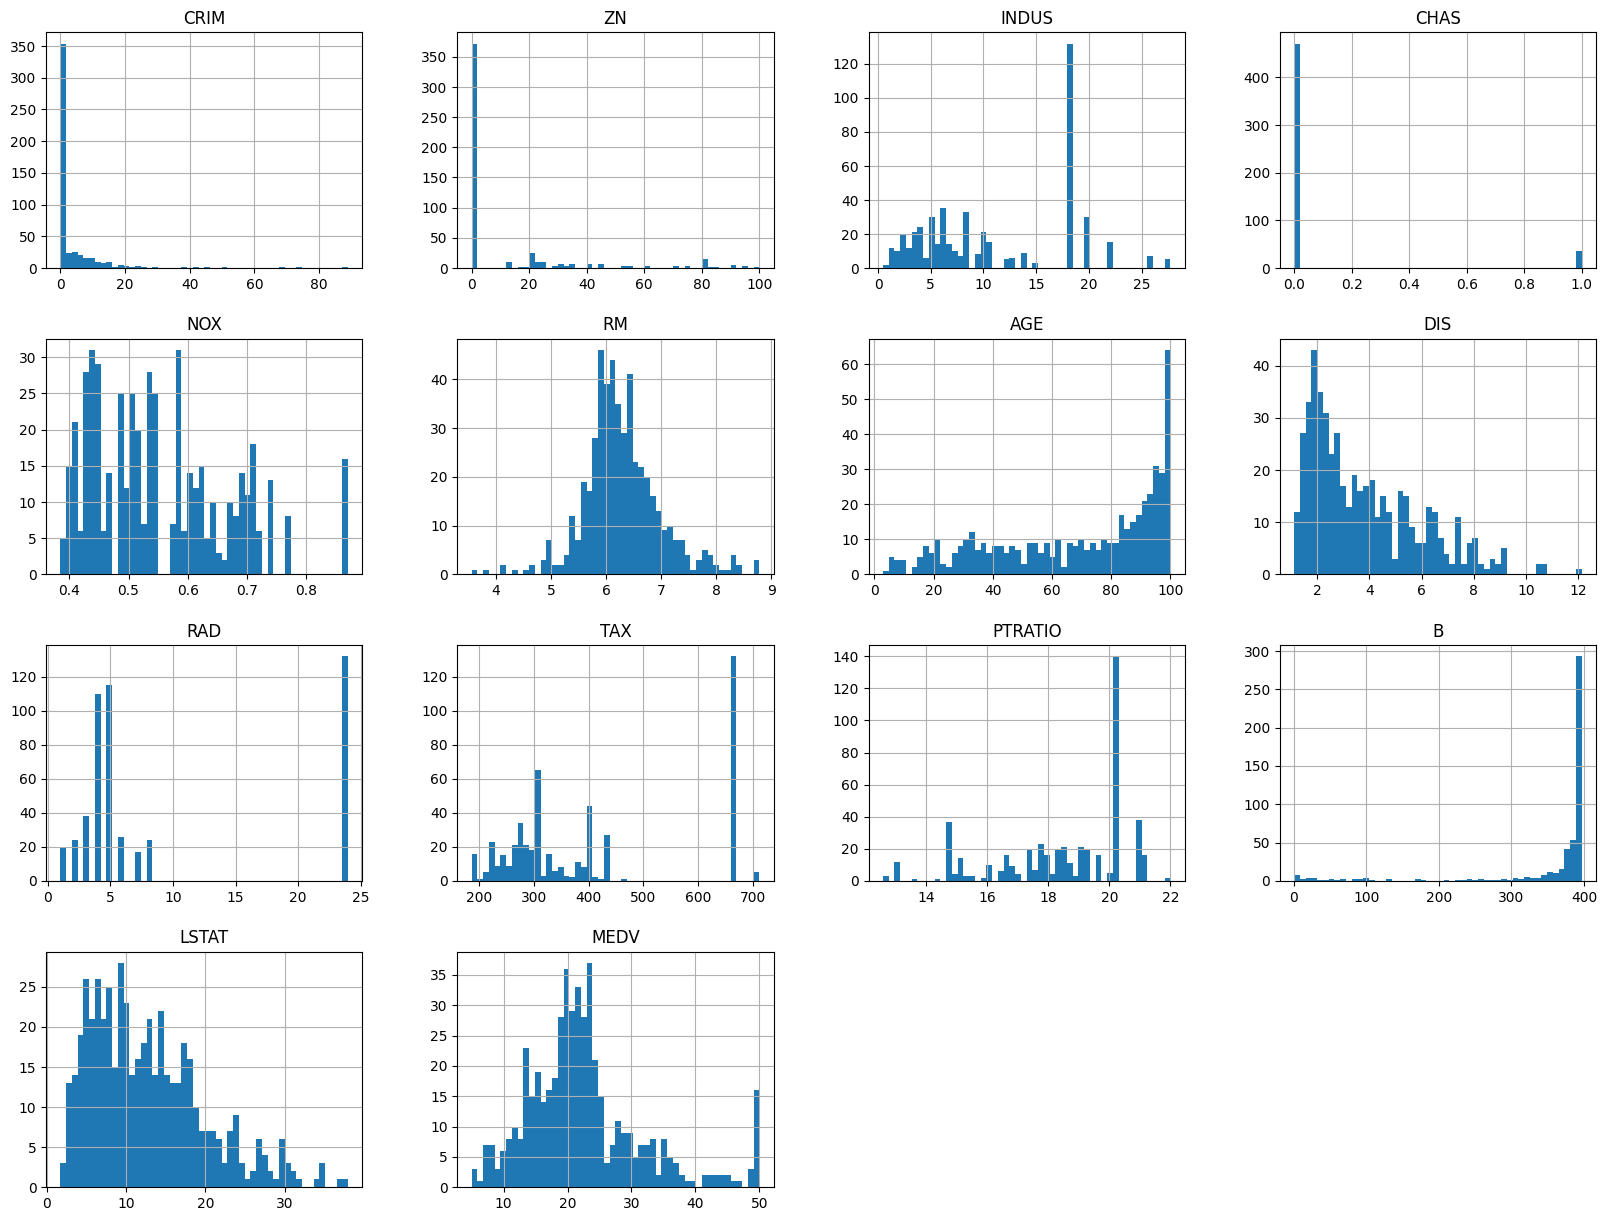

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

### Train-Test splitting

In [9]:
# For Learning Purpose
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,98.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.318827,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.668527,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.939250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.546750,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
#95/7 

In [18]:
#376/28

In [19]:
housing = strat_train_set.copy()

### Looking for Co-relations 

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678715
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='PTRATIO'>,
        <AxesSubplot: xlabel='RM', ylabel='PTRATIO'>,
        <AxesSubplot: xlabel='ZN', ylabel='PTRATIO'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='PTRATIO'>,

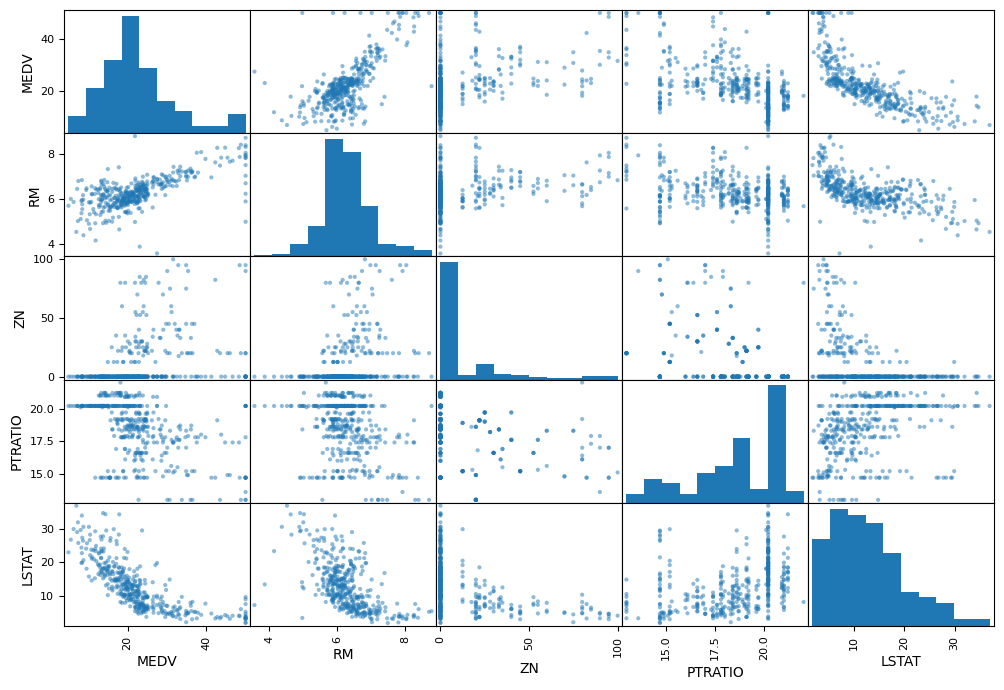

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","PTRATIO","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

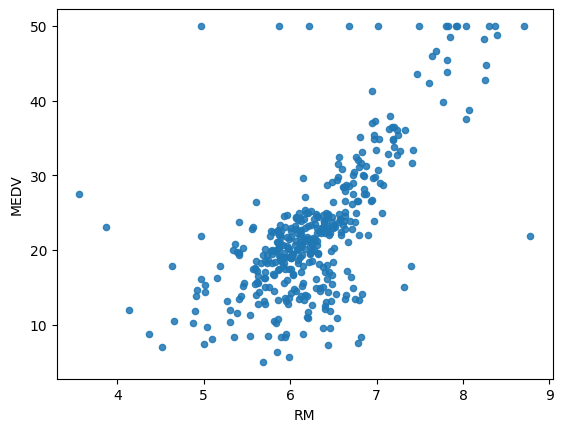

In [23]:
housing.plot(kind="scatter", x='RM', y="MEDV", alpha=0.85)

### Trying out Attribute combinations

In [24]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678715
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523551
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

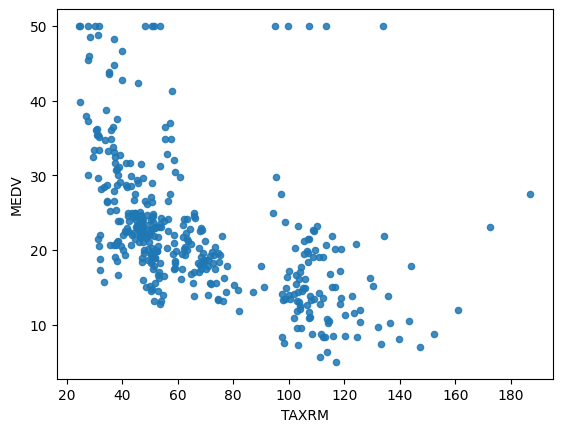

In [27]:
housing.plot(kind="scatter", x='TAXRM', y="MEDV", alpha=0.85)

In [28]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

### Missing Attributes

In [29]:
# To take care of missing attributes we have 3 options-
#            1. Git rid of the missing data points
#            2. Get rid of the whole attribute
#            3. Set the value to 0/mean/median

In [30]:
a = housing.dropna(subset=["RM"]) #Option(1)
a.shape
#There is no RM column and the original housing dataframe will be unchanged

(402, 13)

In [31]:
housing.drop("RM", axis=1).shape #Option(2)
#There is no RM column and the original housing dataframe will be unchanged

(404, 12)

In [32]:
median = housing["RM"].median() #Option(3) for median
median

6.21

In [33]:
mean = housing["RM"].mean()
mean

6.278771144278607

In [34]:
housing["RM"].fillna(mean) #Option(3) for mean
#There is no RM column and the original housing dataframe will be unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
housing.shape

(404, 13)

In [36]:
housing.describe() #Before starting imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,402.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278771,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713337,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")
imputer.fit(housing)

SimpleImputer()

In [38]:
imputer.statistics_

array([3.60281403e+00, 1.08366337e+01, 1.13449505e+01, 6.93069307e-02,
       5.58063614e-01, 6.27877114e+00, 6.90398515e+01, 3.74620965e+00,
       9.73514851e+00, 4.12341584e+02, 1.84732673e+01, 3.53392822e+02,
       1.27916089e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278771,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711565,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### Scikit-learn Design

Primarily three types of objects

1. Estimators - It estimates some parameters based on a dataset. Eg - Imputer
      It has a fit method and transfom method.
      Fit method - fits the dataset and calculate internal parameters
      Transform method - might transform the dataset with the internal paraneters
      
2. Transformers - takes input and returns output based on the learnings from fit().
                  It also has a convenient function called fit_transform() which does both fit and transform together.
                  
3. Predictors - eg - LinearRegresseion model
        fit() and predict() are two common functions. It also gives score() function which will evaluate the prediction.

#### Feature Scaling

Primarily two types of feature scaling methods:
1. Min-Max scaling(Normalization)  
   (value - min)/(value - max)
   scikitlearn provides class called MinMaxScaler for this
   
2. Standardization   
   (value - mean)/standard_deviation
   sklearn provides a class called StandardScaler for this

#### Creating a Pipeline 

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "mean")),
    #.....Add as many as you want in your pipeline....
    ('std_scaler',StandardScaler())
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr #This is a numPy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [45]:
housing_num_tr.shape

(404, 13)

### Selecting a desired model for Aves Real Estate

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]

In [48]:
some_labels = housing_labels.iloc[:5]

In [49]:
prepared_data = my_pipeline.transform(some_data)

In [50]:
model.predict(prepared_data)

array([22.383, 25.388, 16.714, 23.296, 23.481])

In [51]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [53]:
mse

1.5348015148514818

In [54]:
rmse

1.2388710646598708

### Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring ="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [56]:
rmse_scores

array([2.78497692, 2.7783671 , 4.47926675, 2.56131293, 3.77809882,
       2.5840769 , 4.98026187, 3.43043821, 3.16152123, 3.10571825])

In [57]:
import numpy as np
def print_scores(scores):
    print("Scores are : ", scores)
    print("Mean : ", scores.mean())
    print("Std Deviation : ", scores.std())

In [58]:
print_scores(rmse_scores)

Scores are :  [2.78497692 2.7783671  4.47926675 2.56131293 3.77809882 2.5840769
 4.98026187 3.43043821 3.16152123 3.10571825]
Mean :  3.3644038968352823
Std Deviation :  0.7791366950473608


### Saving the Model

In [59]:
from joblib import dump, load
dump(model, 'Aves.joblib')

['Aves.joblib']

### Testing the Model on test data

In [60]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [61]:
final_rmse

2.863696937013207

In [62]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24029136, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

### Using the model

In [63]:
from joblib import dump, load

model = load('Aves.joblib')
import numpy as np
input = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24029136, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.383])